In [1]:
import pandas as pd
import sklearn
import sklearn.datasets

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14,10)
plt.rcParams['font.size'] = 16

In [2]:
data = sklearn.datasets.load_iris(as_frame=True)

In [3]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = data['frame']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
def scatterMatrix(dataFrame, labelColumn):
    ''''
    Makes a so-called matrix scatter using data from dataFrame. 
    Uses the labelColumn as label and plots each category with different 
    colors/markers. 
    
    Category aware compared to pandas function. 
    
    Assumes labels are integers 0, L-1, where L is the number of unique labels
    inferred from the dataFrame[labelColumn].
    
    Assumes labelColumn is the last column to be included in scatter, preceeding 
    columns must be numeric. 
    
    Supports only first 5 numeric columns.
    '''
    N = list(dataFrame.columns).index(labelColumn)
    fig, axs = plt.subplots(N,N)

    colors = ['C0','C1','C2','C4','C5']
    markers = ['x','o','+','-','.']
    
    #Number of labels
    L = len(dataFrame.loc[:,labelColumn].unique())
    
    
    #Do scatter on non diagonal axes
    for i in range(N):
        for j in range(N):
            if i == j: ## skip diagonals
                continue
            for label in range(L):
                #grab data 
                x, y = dataFrame.query(f'{labelColumn} == {label}').iloc[:,[i,j]].values.T
                #do acutal plot 
                axs[i,j].plot(x, y, marker = markers[label], color=colors[label], ls="None", alpha=0.5)

    #Do histograms on diagonal.
    for i in range(N):
        for label in range(L):
            x = dataFrame.query(f'{labelColumn} == {label}').iloc[:,i].values.T
            axs[i,i].hist(x,bins='auto', alpha=0.5, color=colors[label])
        
    for axV, axH, label in zip(axs[:,0], axs[-1,:], dataFrame.columns):
        axV.set(ylabel=label)
        axH.set(xlabel=label)
    
    return fig, axs

Text(0.5, 0.98, 'Scatter Matrix Plot of Iris Data')

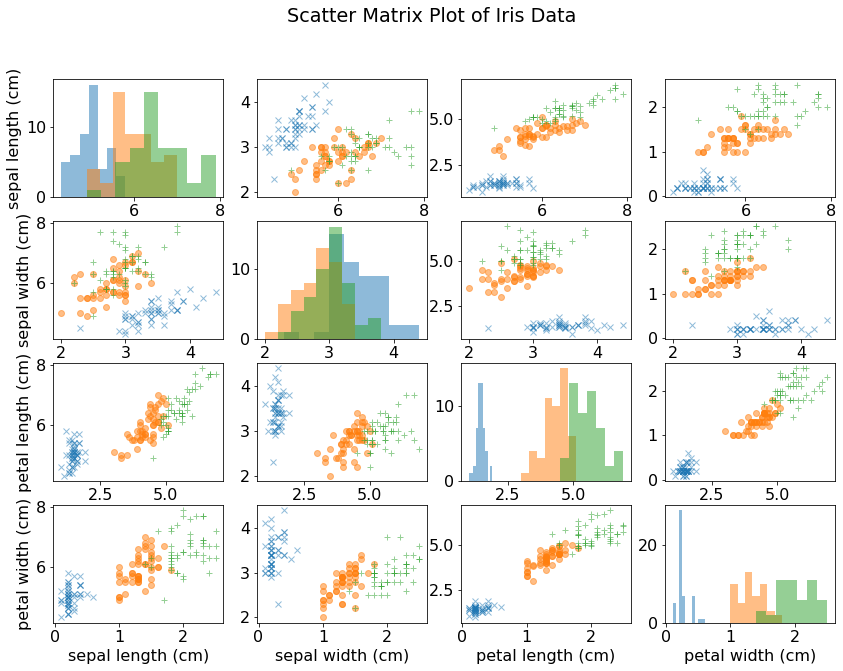

In [8]:
fig, axs = scatterMatrix(df, 'target')
fig.suptitle('Scatter Matrix Plot of Iris Data')